<a href="https://colab.research.google.com/github/VidyaNaresh/Biometric-Attendance-System/blob/main/Biometric_attendance_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Project Title: Biometric Attendance system**

## **Purpose**

A biometric attendance system is a technological marvel that relies on unique physiological or behavioral characteristics of individuals to identify and record their presence. Unlike conventional methods such as manual sign-ins or card swiping, biometric systems use distinctive features like fingerprints, facial recognition, iris patterns, or voice recognition to authenticate and verify the identity of individuals. This not only streamlines the attendance tracking process but also eliminates the possibility of proxy attendance, making it a robust solution for organizations.

In [ ]:
Step 0 : Downloading necessary packages

# Step 0 : Downloading necessary packages

In [ ]:
!pip install mysql-connector-python
!pip install pandas
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
Step 1 : Importing necessary packages

#Step 1 : Importing necessary packages

In [ ]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualizatio

In [ ]:
Step 2 : Establishing Connection (Database connectivity from python to mysql database)

# Step 2 : Establishing Connection (Database connectivity from python to mysql database)

In [ ]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='Nvidya@2001',
host='localhost',
database='biometricattendancesystem'
)

In [ ]:
Step 3 : Data View

# Step 3 : Data View

In [ ]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'users' table
cursor.execute('SELECT * FROM Users')
#After fetching data from the database we are storing it into Pandas DataFrame
Users = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(Users.head())

   user_id first_name last_name                       email phone_number  \
0        1       John       Doe       john.doe1@example.com   1234567890   
1        2       Jane     Smith     jane.smith2@example.com   0987654321   
2        3      Alice   Johnson  alice.johnson3@example.com   5555555555   
3        4        Bob     Brown      bob.brown4@example.com   4444444444   
4        5    Charlie     Davis  charlie.davis5@example.com   3333333333   

    department      role biometric_data          created_at  \
0  Engineering  employee           None 2024-06-03 20:45:40   
1    Marketing   manager           None 2024-06-03 20:45:40   
2           HR  employee           None 2024-06-03 20:45:40   
3      Finance   manager           None 2024-06-03 20:45:40   
4  Engineering  employee           None 2024-06-03 20:45:40   

           updated_at  
0 2024-06-03 20:45:40  
1 2024-06-03 20:45:40  
2 2024-06-03 20:45:40  
3 2024-06-03 20:45:40  
4 2024-06-03 20:45:40  


In [ ]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'AttendanceRecords' table
cursor.execute('SELECT * FROM AttendanceRecords')
#After fetching data from the database we are storing it into Pandas DataFrame
AttendanceRecords = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(AttendanceRecords.head())

   attendance_id  user_id           timestamp   status  device_id  \
0              1        1 2024-06-01 08:00:00  present          1   
1              2        2 2024-06-01 08:05:00  present          1   
2              3        3 2024-06-01 08:10:00  present          1   
3              4        4 2024-06-01 08:15:00  present          1   
4              5        5 2024-06-01 08:20:00  present          1   

           created_at          updated_at  
0 2024-06-03 21:01:54 2024-06-03 21:01:54  
1 2024-06-03 21:01:54 2024-06-03 21:01:54  
2 2024-06-03 21:01:54 2024-06-03 21:01:54  
3 2024-06-03 21:01:54 2024-06-03 21:01:54  
4 2024-06-03 21:01:54 2024-06-03 21:01:54  


In [ ]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'Devices' table
cursor.execute('SELECT * FROM Devices')
#After fetching data from the database we are storing it into Pandas DataFrame
Devices = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(Devices.head())

   device_id device_name    location   ip_address  status  \
0          1    Device 1  Location 1  192.168.1.1  active   
1          2    Device 2  Location 2  192.168.1.2  active   
2          3    Device 3  Location 3  192.168.1.3  active   
3          4    Device 4  Location 4  192.168.1.4  active   
4          5    Device 5  Location 5  192.168.1.5  active   

  last_maintenance_date          created_at          updated_at  
0            2024-05-30 2024-06-03 21:22:12 2024-06-03 21:22:12  
1            2024-05-30 2024-06-03 21:22:12 2024-06-03 21:22:12  
2            2024-05-30 2024-06-03 21:22:12 2024-06-03 21:22:12  
3            2024-05-30 2024-06-03 21:22:12 2024-06-03 21:22:12  
4            2024-05-30 2024-06-03 21:22:12 2024-06-03 21:22:12  


In [ ]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'Departments' table
cursor.execute('SELECT * FROM Departments')
#After fetching data from the database we are storing it into Pandas DataFrame
Departments = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(Departments.head())

  department_name          created_at          updated_at  department_id
0    Department 1 2024-06-03 21:29:15 2024-06-03 21:29:15              1
1    Department 2 2024-06-03 21:29:15 2024-06-05 18:25:10              2
2    Department 3 2024-06-03 21:29:15 2024-06-05 18:25:10              3
3    Department 4 2024-06-03 21:29:15 2024-06-05 18:25:10              4
4    Department 5 2024-06-03 21:29:15 2024-06-05 18:25:10              5


In [ ]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'Roles' table
cursor.execute('SELECT * FROM Roles')
#After fetching data from the database we are storing it into Pandas DataFrame
Roles = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(Roles.head())

   role_id role_name          created_at          updated_at
0        1    Role 1 2024-06-03 21:34:23 2024-06-03 21:34:23
1        2    Role 2 2024-06-03 21:34:23 2024-06-03 21:34:23
2        3    Role 3 2024-06-03 21:34:23 2024-06-03 21:34:23
3        4    Role 4 2024-06-03 21:34:23 2024-06-03 21:34:23
4        5    Role 5 2024-06-03 21:34:23 2024-06-03 21:34:23


In [ ]:
Step 4 : Data Cleaning

#Step 4 : Data Cleaning

In [ ]:
# Check for missing values in each table
print("Missing values in Users Data:")
print(Users.isnull().sum())

print("\nMissing values in AttendanceRecords Data:")
print(AttendanceRecords.isnull().sum())

print("\nMissing values in Devices Data:")
print(Devices.isnull().sum())

print("\nMissing values in Departments Data:")
print(Departments.isnull().sum())

print("\nMissing values in Roles Data:")
print(Roles.isnull().sum())



Missing values in Users Data:
user_id             0
first_name          0
last_name           0
email               0
phone_number        0
department          0
role                0
biometric_data    100
created_at          0
updated_at          0
dtype: int64

Missing values in AttendanceRecords Data:
attendance_id    0
user_id          0
timestamp        0
status           0
device_id        0
created_at       0
updated_at       0
dtype: int64

Missing values in Devices Data:
device_id                0
device_name              0
location                 0
ip_address               0
status                   0
last_maintenance_date    0
created_at               0
updated_at               0
dtype: int64

Missing values in Departments Data:
department_name    0
created_at         0
updated_at         0
department_id      0
dtype: int64

Missing values in Roles Data:
role_id       0
role_name     0
created_at    0
updated_at    0
dtype: int64


In [ ]:
# Check data types of each column in Customer Data
print("Data types in Users Data:")
print(Users.dtypes)

print("Data types in AttendanceRecords Data:")
print(AttendanceRecords.dtypes)

print("Data types in Devices Data:")
print(Devices.dtypes)

print("Data types in Departments Data:")
print(Departments.dtypes)

print("Data types in Roles Data:")
print(Roles.dtypes)
# Similarly, check and ensure appropriate data types for other tables

Data types in Users Data:
user_id                    int64
first_name                object
last_name                 object
email                     object
phone_number              object
department                object
role                      object
biometric_data            object
created_at        datetime64[ns]
updated_at        datetime64[ns]
dtype: object
Data types in AttendanceRecords Data:
attendance_id             int64
user_id                   int64
timestamp        datetime64[ns]
status                   object
device_id                 int64
created_at       datetime64[ns]
updated_at       datetime64[ns]
dtype: object
Data types in Devices Data:
device_id                         int64
device_name                      object
location                         object
ip_address                       object
status                           object
last_maintenance_date            object
created_at               datetime64[ns]
updated_at               datetime64[ns]
dtype:

In [ ]:
# Drop rows with any missing values (NaN) from the dataframe
Users.dropna(inplace=True)
AttendanceRecords.dropna(inplace=True)
Devices.dropna(inplace=True)
Departments.dropna(inplace=True)
Roles.dropna(inplace=True)


In [ ]:
# Print the number of duplicate rows in the DataFrame
print(Users.duplicated().sum())
print(AttendanceRecords.duplicated().sum())
print(Devices.duplicated().sum())
print(Departments.duplicated().sum())
print(Roles.duplicated().sum())

0
0
0
0
0


In [ ]:
Step 5 : Query Execution

# Step 5 : Query Execution

In [ ]:
import pandas as pd
import mysql.connector

# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='Nvidya@2001',
host='localhost',
database='biometricattendancesystem'
)

# Function to fetch data into a DataFrame
def fetch_data(query):
    cursor = connection.cursor()
    cursor.execute(query)
    rows = cursor.fetchall()
    colnames = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(rows, columns=colnames)
    cursor.close()
    return df

# Query to select users' user_id in ascending order
Users_user_id_query_asc = """
SELECT user_id,phone_number
FROM Users
ORDER BY user_id ASC;
"""

# Fetching data and storing it in a DataFrame
Users_user_id_df_asc = fetch_data(Users_user_id_query_asc)

print("Users user_id in Ascending Order:")
print(Users_user_id_df_asc)

# Close the database connection
connection.close()

Users user_id in Ascending Order:
    user_id phone_number
0         1   1234567890
1         2   0987654321
2         3   5555555555
3         4   4444444444
4         5   3333333333
..      ...          ...
95       96   7878787879
96       97   7979797980
97       98   8080808081
98       99   8181818182
99      100   8282828283

[100 rows x 2 columns]


In [ ]:
import pandas as pd
import mysql.connector

# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='Nvidya@2001',
host='localhost',
database='biometricattendancesystem'
)

# Function to fetch data into a DataFrame
def fetch_data(query):
    cursor = connection.cursor()
    cursor.execute(query)
    rows = cursor.fetchall()
    colnames = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(rows, columns=colnames)
    cursor.close()
    return df

# Query to select AttendanceRecords_user_id_df_desc
AttendanceRecords_user_id_df_desc = """
SELECT user_id, device_id
FROM  AttendanceRecords
ORDER BY user_id DESC;
"""

# Fetching data and storing it in a DataFrame
AttendanceRecords_user_id_df_desc = fetch_data(Users_user_id_query_asc)

print("AttendanceRecords user_id in Descending Order:")
print(AttendanceRecords_user_id_df_desc)

# Close the database connection
connection.close()

AttendanceRecords user_id in Descending Order:
    user_id phone_number
0         1   1234567890
1         2   0987654321
2         3   5555555555
3         4   4444444444
4         5   3333333333
..      ...          ...
95       96   7878787879
96       97   7979797980
97       98   8080808081
98       99   8181818182
99      100   8282828283

[100 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pip install pymysql


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   ------------------ --------------------- 20.5/45.0 kB 330.3 kB/s eta 0:00:01
   ------------------------------------ --- 41.0/45.0 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 445.3 kB/s eta 0:00:00


In [ ]:
Step-6 :Data Visualization

# Step-6 :Data Visualization

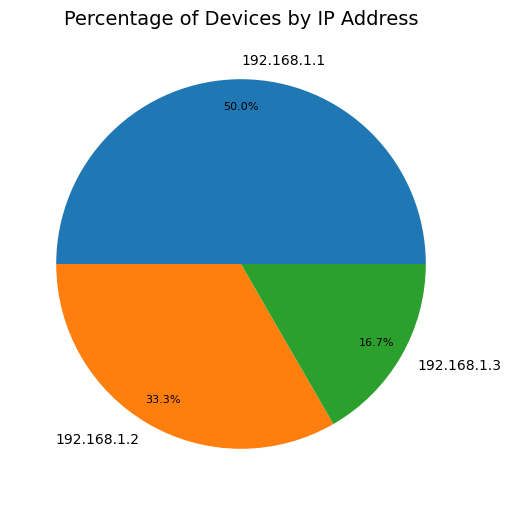

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace this with your actual data
# For example:
Devices = pd.DataFrame({'ip_address': ['192.168.1.1', '192.168.1.2', '192.168.1.1', '192.168.1.3', '192.168.1.1', '192.168.1.2']})

# Count the occurrences of each ip_address
ip_address_counts = Devices['ip_address'].value_counts()

# Set the figure size to 6x6 inches
plt.figure(figsize=(6, 6))

# Create the pie chart
patches, texts, autotexts = plt.pie(
    ip_address_counts.values,
    labels=ip_address_counts.index,
    autopct='%1.1f%%',
    pctdistance=0.85,
    textprops={'fontsize': 10}  # Set font size for labels
)

# Adjust the font size of the percentage texts
for autotext in autotexts:
    autotext.set_fontsize(8)  # Set font size for percentage texts

# Set the chart title
plt.title('Percentage of Devices by IP Address', fontsize=14)

# Display the chart
plt.show()


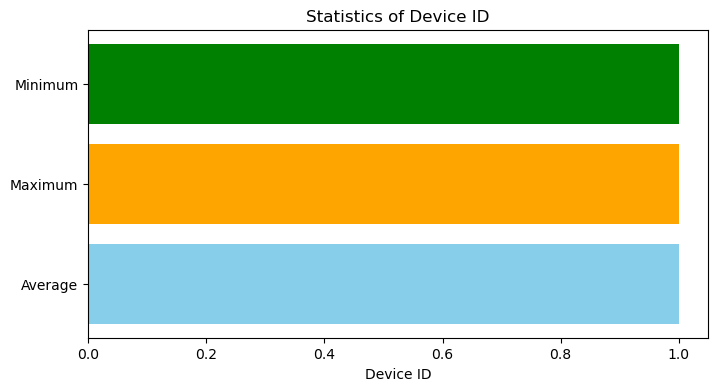

In [ ]:
import matplotlib.pyplot as plt

# Calculate the statistics
average_device_id = AttendanceRecords['device_id'].mean()
max_device_id = AttendanceRecords['device_id'].max()
min_device_id = AttendanceRecords['device_id'].min()

# Plotting the horizontal bar chart
plt.figure(figsize=(8, 4))
plt.barh(['Average', 'Maximum', 'Minimum'], [average_device_id, max_device_id, min_device_id], color=['skyblue', 'orange', 'green'])
plt.xlabel('Device ID')
plt.title('Statistics of Device ID')
plt.show()


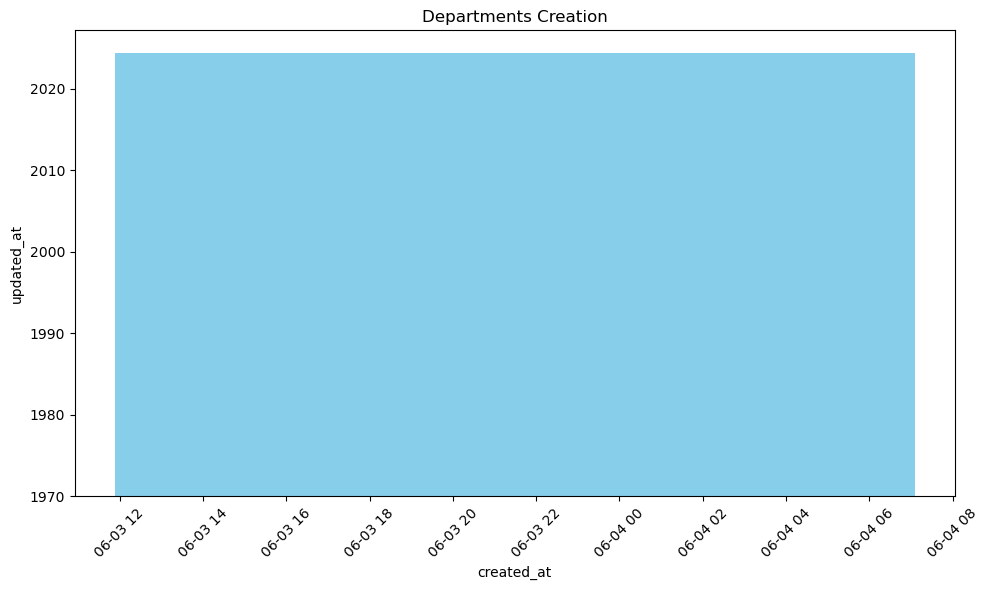

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'departments' is a DataFrame containing data
# Plotting the top 10 users id-wise
plt.figure(figsize=(10, 6))
plt.bar(Departments['created_at'], Departments['updated_at'], color='skyblue')
plt.xlabel('created_at')
plt.ylabel('updated_at')
plt.title('Departments Creation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


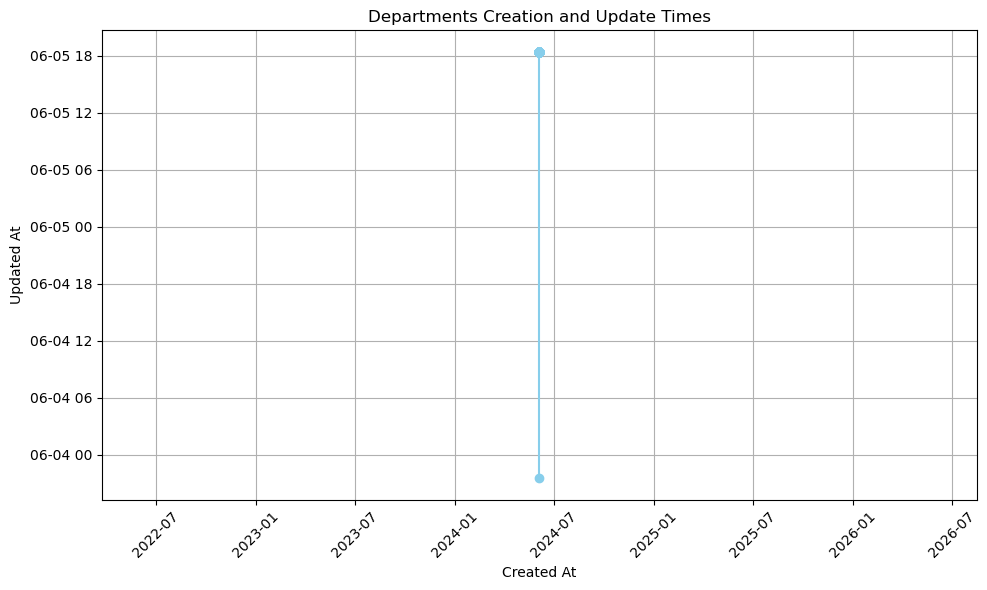

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Departments' is a DataFrame containing data
# Plotting the data from 'created_at' and 'updated_at' columns
plt.figure(figsize=(10, 6))
plt.plot(Departments['created_at'], Departments['updated_at'], marker='o', color='skyblue')
plt.xlabel('Created At')
plt.ylabel('Updated At')
plt.title('Departments Creation and Update Times')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


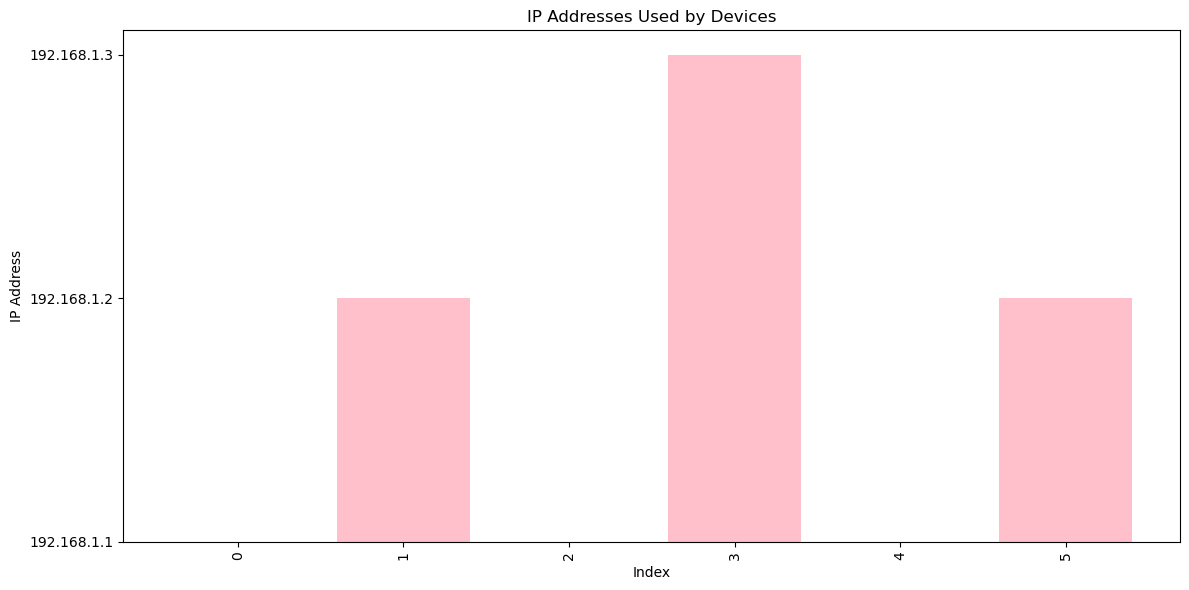

In [ ]:
import matplotlib.pyplot as plt

# Plotting the devices using ip address
plt.figure(figsize=(12, 6))
plt.bar(range(len(Devices)), Devices['ip_address'], color='pink')
plt.xlabel('Index')
plt.ylabel('IP Address')
plt.title('IP Addresses Used by Devices')
plt.xticks(range(len(Devices)), range(len(Devices)))  # Set xticks to index values
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


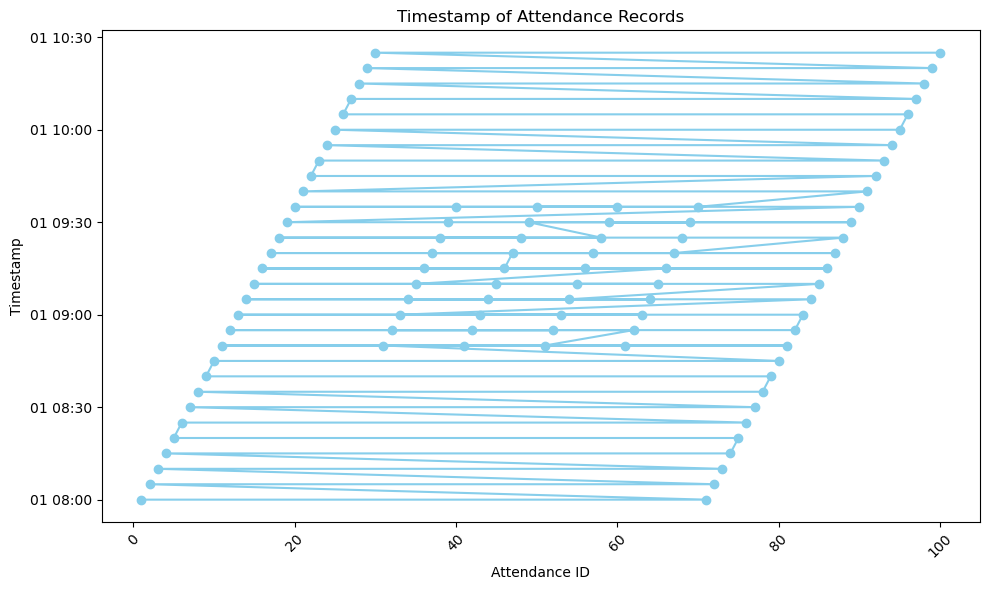

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'timestamp' to ensure the line plot is in chronological order
AttendanceRecords_sorted = AttendanceRecords.sort_values(by='timestamp')

# Plotting the timestamp using a line graph
plt.figure(figsize=(10, 6))
plt.plot(AttendanceRecords_sorted['attendance_id'], AttendanceRecords_sorted['timestamp'], color='skyblue', marker='o', linestyle='-')
plt.xlabel('Attendance ID')
plt.ylabel('Timestamp')
plt.title('Timestamp of Attendance Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
Histogram of Attendance Records Timestamp

# Histogram of Attendance Records Timestamp

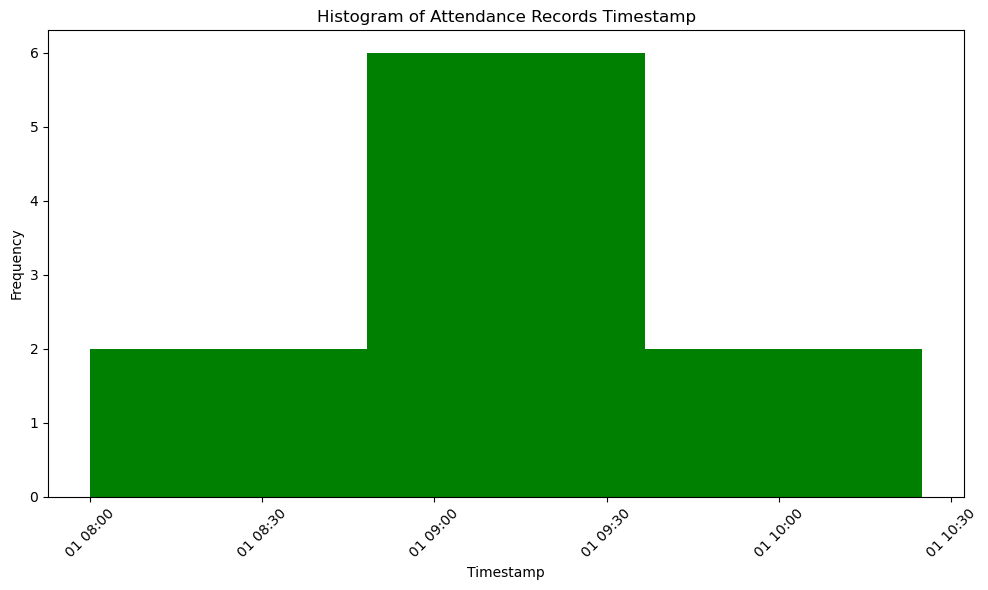

In [ ]:
import matplotlib.pyplot as plt

# Plotting the timestamp using a histogram
plt.figure(figsize=(10, 6))
plt.hist(AttendanceRecords['timestamp'], bins=30, color='green')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.title('Histogram of Attendance Records Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
Bar Plot of Department Counts:

# Bar Plot of Department Counts:

C:\Users\nvidy\AppData\Local\Temp\ipykernel_8080\2749169471.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  departments_df = pd.read_sql(query, connection)


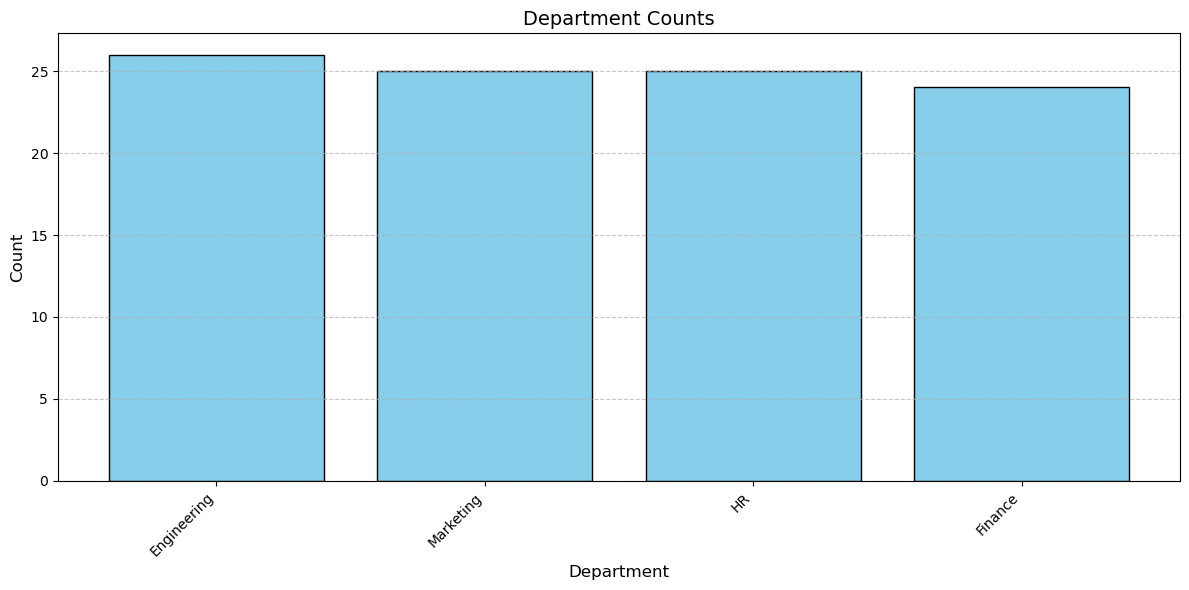

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connect to your MySQL database
# Replace 'username', 'password', 'database_name', and 'host' with your actual credentials
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Nvidya@2001",
    database="biometricattendancesystem"
)

# Query to fetch department counts
query = "SELECT department, COUNT(*) AS count FROM Users GROUP BY department"

# Execute the query and fetch the results into a DataFrame
departments_df = pd.read_sql(query, connection)

# Close the database connection
connection.close()

# Plotting the bar plot with enhanced design
plt.figure(figsize=(12, 6))
plt.bar(departments_df['department'], departments_df['count'], color='skyblue', edgecolor='black')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Department Counts', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\nvidy\AppData\Local\Temp\ipykernel_8080\256975367.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  attendance_df = pd.read_sql(query, connection)


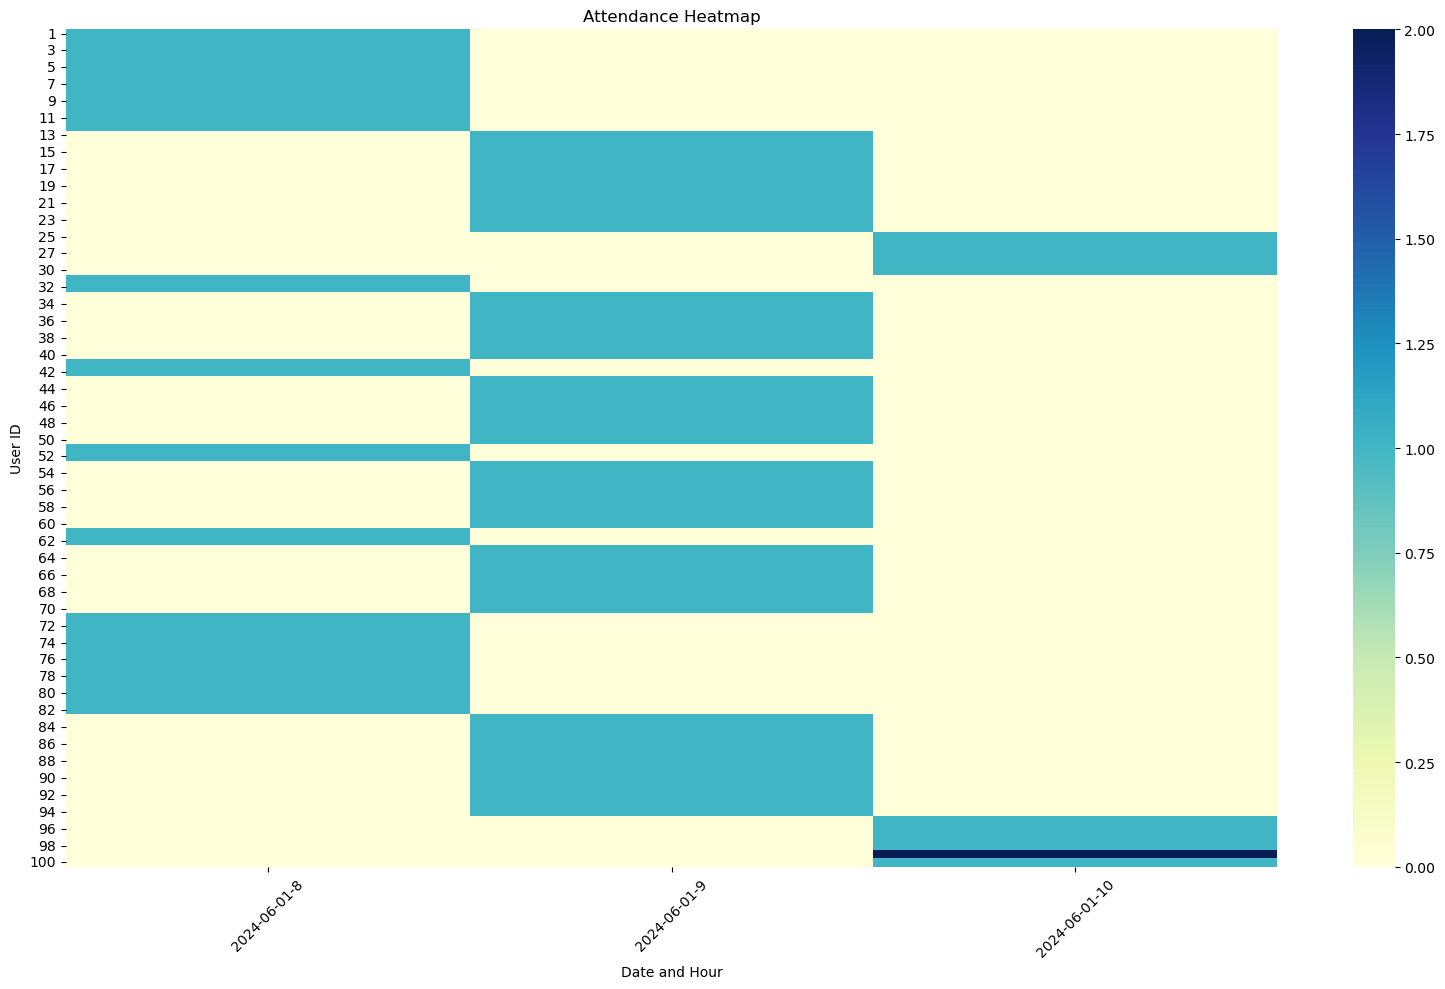

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Connect to your MySQL database
# Replace 'username', 'password', 'database_name', and 'host' with your actual credentials
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Nvidya@2001",
    database="biometricattendancesystem"
)

# Query to fetch attendance data
query = """
    SELECT user_id, DATE(timestamp) AS date, HOUR(timestamp) AS hour
    FROM AttendanceRecords
"""

# Execute the query and fetch the results into a DataFrame
attendance_df = pd.read_sql(query, connection)

# Close the database connection
connection.close()

# Pivot the DataFrame to get attendance data in the required format for heatmap
pivot_df = attendance_df.pivot_table(index='user_id', columns=['date', 'hour'], aggfunc=len, fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df, cmap="YlGnBu")
plt.title('Attendance Heatmap')
plt.xlabel('Date and Hour')
plt.ylabel('User ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
Device Health Metrics

# Device Health Metrics

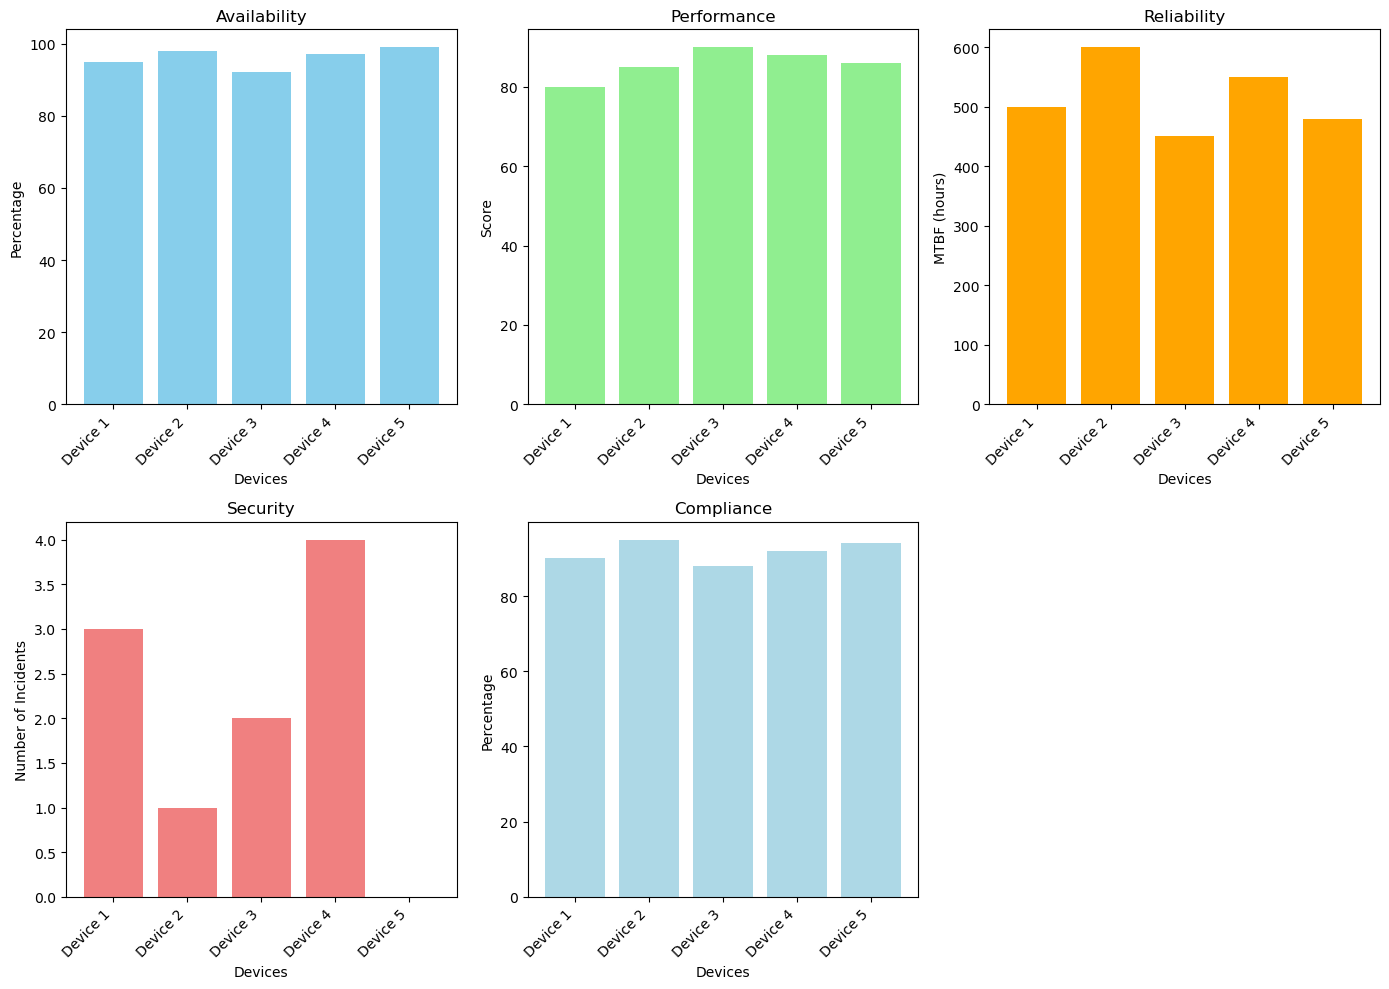

In [ ]:
import matplotlib.pyplot as plt

# Sample device health metrics data
devices = ['Device 1', 'Device 2', 'Device 3', 'Device 4', 'Device 5']
availability = [95, 98, 92, 97, 99]  # Availability percentage
performance = [80, 85, 90, 88, 86]  # Performance score out of 100
reliability = [500, 600, 450, 550, 480]  # Mean time between failures (MTBF) in hours
security = [3, 1, 2, 4, 0]  # Number of security incidents
compliance = [90, 95, 88, 92, 94]  # Compliance percentage

# Plotting device health metrics
plt.figure(figsize=(14, 10))

# Availability plot
plt.subplot(2, 3, 1)
plt.bar(devices, availability, color='skyblue')
plt.title('Availability')
plt.xlabel('Devices')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

# Performance plot
plt.subplot(2, 3, 2)
plt.bar(devices, performance, color='lightgreen')
plt.title('Performance')
plt.xlabel('Devices')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')

# Reliability plot
plt.subplot(2, 3, 3)
plt.bar(devices, reliability, color='orange')
plt.title('Reliability')
plt.xlabel('Devices')
plt.ylabel('MTBF (hours)')
plt.xticks(rotation=45, ha='right')

# Security plot
plt.subplot(2, 3, 4)
plt.bar(devices, security, color='lightcoral')
plt.title('Security')
plt.xlabel('Devices')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')

# Compliance plot
plt.subplot(2, 3, 5)
plt.bar(devices, compliance, color='lightblue')
plt.title('Compliance')
plt.xlabel('Devices')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
Device Usage Patterns

# Device Usage Patterns

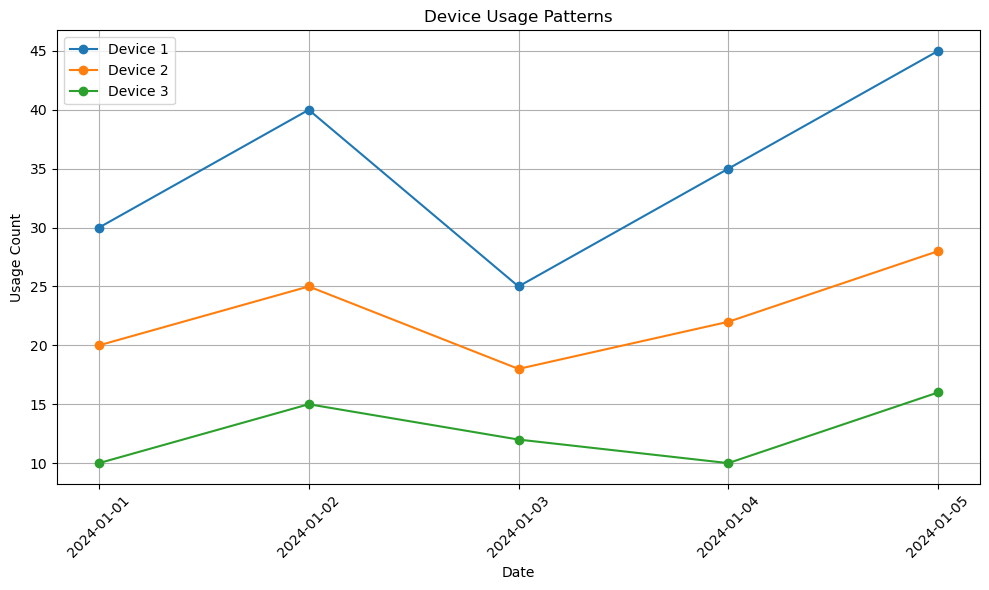

In [ ]:
import matplotlib.pyplot as plt

# Sample data for device usage patterns
dates = ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05']
device1_usage = [30, 40, 25, 35, 45]  # Usage counts for Device 1
device2_usage = [20, 25, 18, 22, 28]  # Usage counts for Device 2
device3_usage = [10, 15, 12, 10, 16]  # Usage counts for Device 3

# Convert dates to datetime objects if needed
# dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Plotting device usage patterns
plt.figure(figsize=(10, 6))

plt.plot(dates, device1_usage, marker='o', label='Device 1')
plt.plot(dates, device2_usage, marker='o', label='Device 2')
plt.plot(dates, device3_usage, marker='o', label='Device 3')

plt.title('Device Usage Patterns')
plt.xlabel('Date')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
Device Location Distribution

# Device Location Distribution

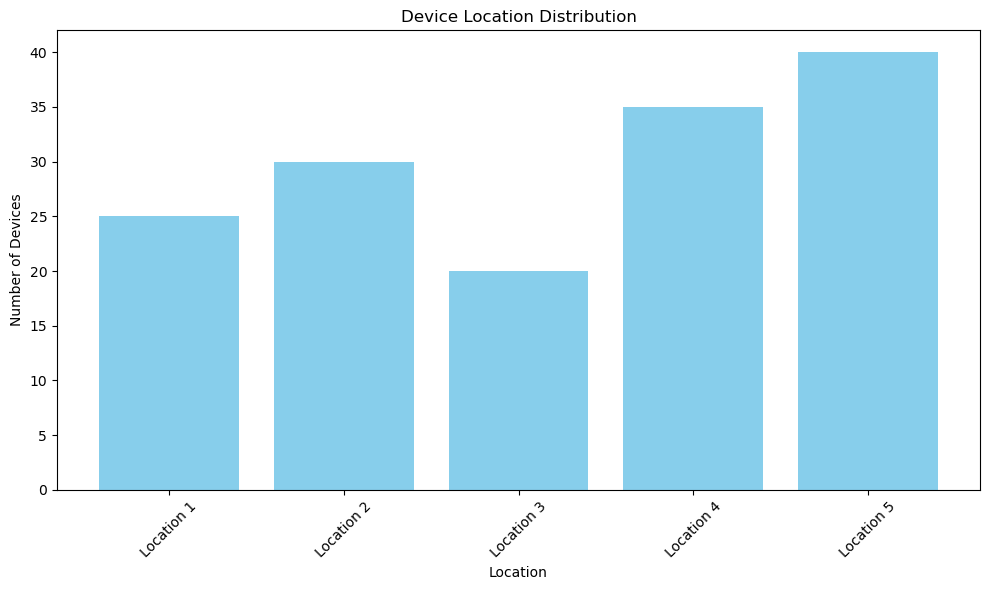

In [ ]:
import matplotlib.pyplot as plt

# Sample data for device locations
locations = ['Location 1', 'Location 2', 'Location 3', 'Location 4', 'Location 5']
device_counts = [25, 30, 20, 35, 40]  # Number of devices in each location

# Plotting device location distribution using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(locations, device_counts, color='skyblue')
plt.title('Device Location Distribution')
plt.xlabel('Location')
plt.ylabel('Number of Devices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


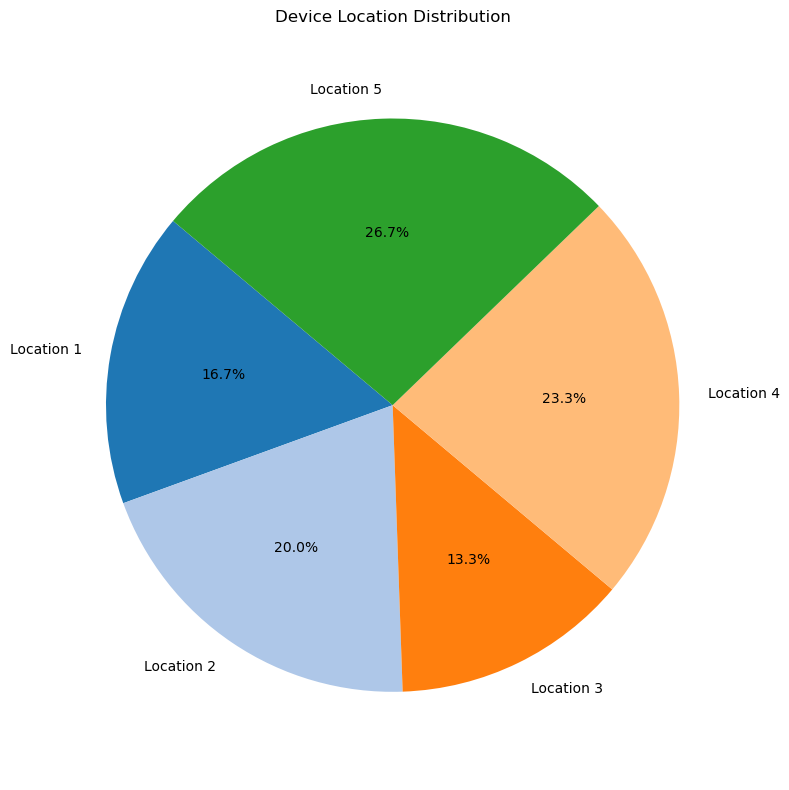

In [ ]:
# Plotting device location distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(device_counts, labels=locations, autopct='%1.1f%%', colors=plt.cm.tab20.colors, startangle=140)
plt.title('Device Location Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


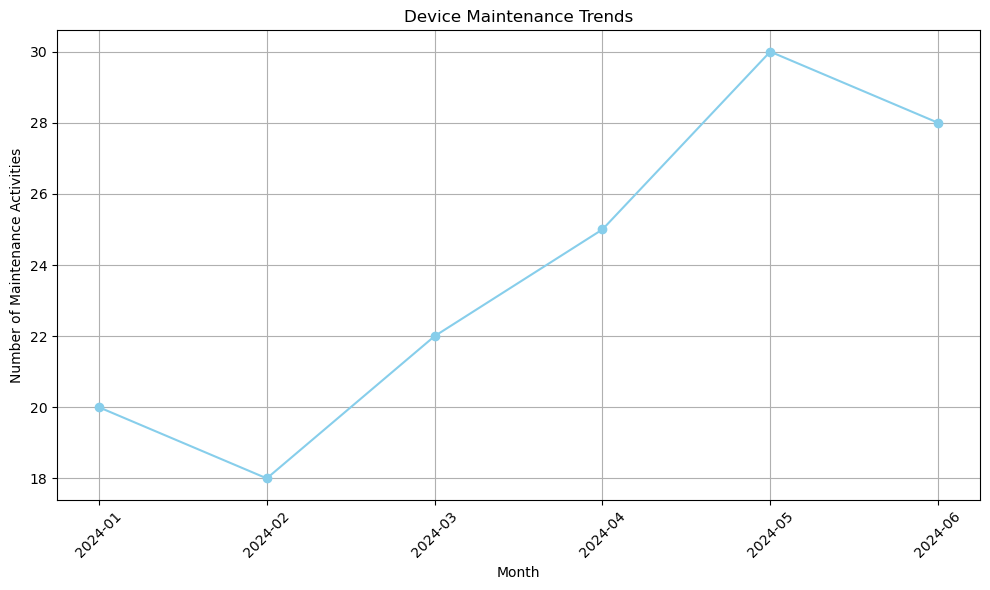

In [ ]:
import matplotlib.pyplot as plt

# Sample data for device maintenance trends
dates = ['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06']  # Months
maintenance_counts = [20, 18, 22, 25, 30, 28]  # Number of maintenance activities per month

# Plotting device maintenance trends using a line plot
plt.figure(figsize=(10, 6))
plt.plot(dates, maintenance_counts, marker='o', color='skyblue', linestyle='-')
plt.title('Device Maintenance Trends')
plt.xlabel('Month')
plt.ylabel('Number of Maintenance Activities')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for better visualization
plt.tight_layout()
plt.show()


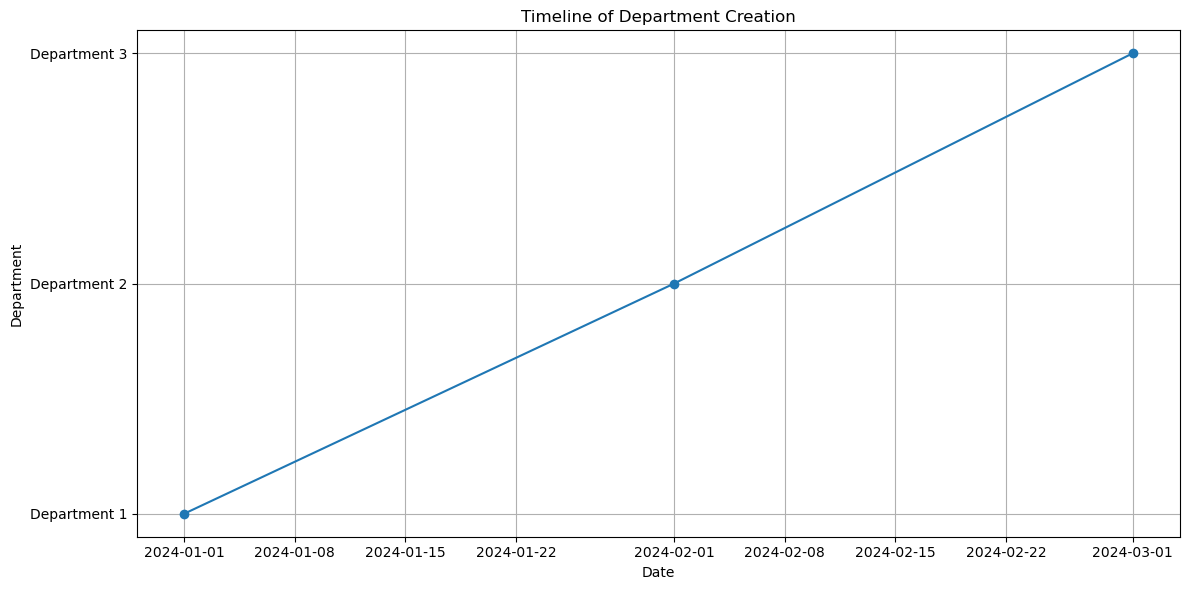

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'df' containing the department data
# Example data creation for demonstration purposes
data = {
    'department_name': ['Department 1', 'Department 2', 'Department 3'],
    'created_at': ['2024-01-01', '2024-02-01', '2024-03-01']
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert the 'created_at' column to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Sort departments by creation date
df_sorted = df.sort_values(by='created_at')

# Plot the timeline
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['created_at'], range(1, len(df_sorted) + 1), marker='o', linestyle='-')
plt.yticks(range(1, len(df_sorted) + 1), df_sorted['department_name'])
plt.title('Timeline of Department Creation')
plt.xlabel('Date')
plt.ylabel('Department')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
conclusion:

In conclusion, a biometric attendance system offers a multitude of benefits for organizations seeking to enhance their attendance tracking processes. By leveraging unique biological traits like fingerprints, iris patterns, or facial features, these systems provide unparalleled accuracy and security in recording employee attendance.

The implementation of a biometric attendance system facilitates the prevention of time theft, increases security measures, and streamlines administrative tasks, ultimately leading to improved operational efficiency. Real-time monitoring capabilities empower managers to identify attendance patterns promptly and address any issues that may arise. Additionally, the integration of biometric attendance data with other HR and payroll systems ensures compliance with labor regulations and facilitates accurate payroll processing.

Moreover, the deployment of biometric technology fosters a culture of accountability and punctuality among employees, contributing to a positive work environment and increased productivity. Overall, a biometric attendance system serves as a valuable tool for organizations striving to optimize workforce management processes, enhance security protocols, and drive overall organizational success.